## Logistic Regression

## IRIS data set
> - **label**: species   
> - **features**: sepal_length, sepal_width, petal_length, petal_width

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Make it binary
data=iris[iris['species']!='virginica']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


## Estimation

In [4]:
from sklearn.linear_model import LogisticRegression

X = data[['sepal_width','petal_width']]
y = data['species']
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
clf.fit(X, y)

print(clf.intercept_)
print(clf.coef_)

[2.42148338]
[[-1.76171746  3.815637  ]]


In [7]:
from sklearn.preprocessing import LabelEncoder
y1 = LabelEncoder().fit_transform(y)
y1[:5]

array([0, 0, 0, 0, 0])

## Data Visualization

In [8]:
import numpy as np
sw = np.linspace(2,5,20)
pw = (-clf.intercept_[0]/clf.coef_[0][1]) - (clf.coef_[0][0]/clf.coef_[0][1])*sw

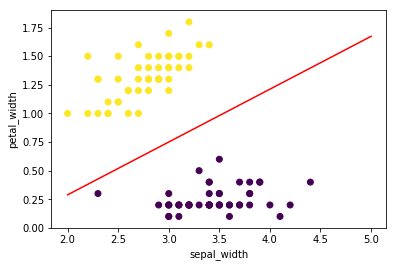

In [9]:
import matplotlib.pyplot as plt
plt.figure()

plt.scatter(X['sepal_width'],X['petal_width'], c=y1)
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.plot(sw,pw,color='red')

## Predictions

In [10]:
ypred = clf.predict(X)
ypred[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [11]:
ypred_prob = clf.predict_proba(X)
ypred_prob[:10]

array([[0.95172675, 0.04827325],
       [0.89095581, 0.10904419],
       [0.92077218, 0.07922782],
       [0.90693   , 0.09307   ],
       [0.95920605, 0.04079395],
       [0.94896983, 0.05103017],
       [0.91861416, 0.08138584],
       [0.94295771, 0.05704229],
       [0.87262494, 0.12737506],
       [0.93451931, 0.06548069]])

## Evaluation

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ypred,y)

array([[50,  0],
       [ 0, 50]])

In [13]:
accuracy_score(ypred,y)

1.0

## Activity 1
> Use the data generated by the next cell to do the Logistic Regression.  
> Split the data into training (80%) and testing (20%).  
> Do the Logistic Regression.  
> Plot the training data and the fitted line (x2 on y-axis, and x1 on x-axis).  
> plot the testing data and the fitted line (x2 on y-axis, and x1 on x-axis).  
> Report the confusion matrix.  

In [15]:
import numpy as np
np.random.seed(2019)

x1 = np.random.standard_normal(1000)           # some continuous variables 
x2 = np.random.standard_normal(1000)
z = 1 + 2*x1 + 3*x2        # linear combination with a bias
pr = 1/(1+np.exp(-z))         # pass through an inv-logit function
y = (pr > 0.5).astype('uint8') 

import pandas as pd
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df.head()

,x1,x2,y
0,-0.217679,-1.424184,0
1,0.821455,0.427360,1
2,1.481278,0.668849,1
3,1.331864,-0.015787,1
4,-0.361865,-0.491017,0


In [17]:
X = df[['x1','x2']]
y = df['y']

In [18]:
## Splitting Data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=2)

In [19]:
print(Xtrain.shape)
print(Xtest.shape)

(800, 2)
(200, 2)


In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')

clf.fit(Xtrain, ytrain)

print(clf.intercept_)
print(clf.coef_)

[2.17556822]
[[4.37776481 6.53152735]]


In [22]:
# Predictions
ypred = clf.predict(Xtest)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(ytest,ypred)

array([[ 83,   0],
       [  0, 117]])

In [24]:
accuracy_score(ytest,ypred)

1.0

In [25]:
import numpy as np

z1 = np.linspace(-3,3,20)
z2 = (-clf.intercept_[0]/clf.coef_[0][1]) - (clf.coef_[0][0]/clf.coef_[0][1])*z1

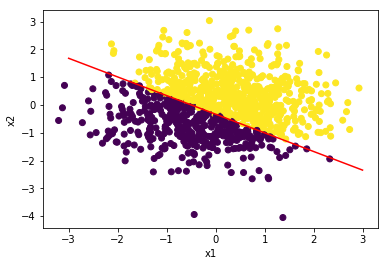

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['x1'],df['x2'],c=df['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(z1,z2,color='red')